<a href="https://colab.research.google.com/github/alicescfernandes/AA_jupyter/blob/master/AA_17_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['class_0' 'class_1' 'class_2']
[0 1 2]


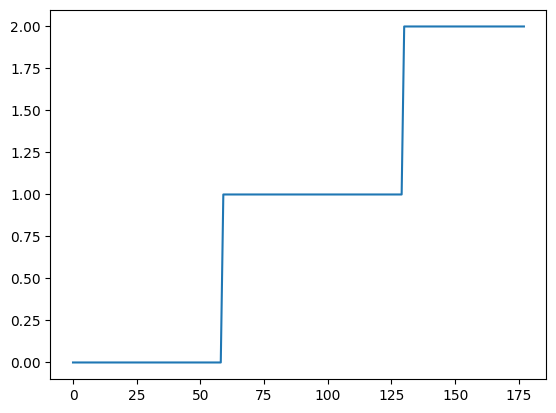

In [ ]:
# Lab date: 17/10/2025
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import numpy.random as rd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

D = dt.load_wine() # carregar o dataset. retorna de um dicionário
print(D.target_names) # classes do dataset
# print(D.data) # dados

X = D.data # 150 linhas, 4 parametros por linha de dados. Linhas = N; Colunas = d
y = D.target # labels de classificação real - classificação real (array 1d com as classes reais)

print(np.unique(y))

plt.plot(y)
plt.show()


In [ ]:

# dividir em 2
X1, X2, y1, y2 = train_test_split(X,y,test_size=1/3, random_state=42) # documentacao diz que faz o split de forma aleatoria
# random_state = 42 para garantir que o split seja sempre o mesmo
print(X1.shape)
print(X2.shape)


(118, 13)
(60, 13)


In [ ]:

# treinar um discriminante logistico (tipo de classificador)
# estimar os parametros do modelo é um processo de otimização e iterativo (ou seja, nao é um processo exatos)
lr = LogisticRegression(max_iter=10_000, random_state=42).fit(X1,y1) # treina o modelo, classificação binária com um classificador. Não é modelo de regressão.
# random_state = 42 para garantir que o modelo seja sempre o mesmo

# matriz de coeficientes: tipicamente inicializa-se com zeros + numeros aleatorios
W = lr.coef_ # matriz de coeficientes de cada classe para cada parametro (d x c) d=numero de parametros, c=numero de classes
# (linhas = classes, colunas = parametros)
# print(W)

print("numero de iteracoes para otimizar o modelo: ", lr.n_iter_) # numero de iteracoes para otimizar o modelo (maximo de iteracoes)

score = lr.score(X2,y2) # avaliar o modelo usando os dados de teste
print("score: ", score)


numero de iteracoes para otimizar o modelo:  [3173]
score:  1.0


In [ ]:

y2e = lr.predict(X2) # predizer as classes dos dados de teste.
print("matriz de confusao:\n", confusion_matrix(y2,y2e)) # cria uma matriz de confusao para avaliar o modelo
print("quantos dados foram classificados corretamente: ", np.sum(y2==y2e)) # quantos dados foram classificados corretamente
print("quantos dados foram classificados incorretamente: ", np.sum(y2!=y2e)) # quantos dados foram classificados incorretamente



matriz de confusao:
 [[21  0  0]
 [ 0 24  0]
 [ 0  0 15]]
quantos dados foram classificados corretamente:  60
quantos dados foram classificados incorretamente:  0



iteracao:  0
matriz de confusao:
 [[17  0  0]
 [ 0 23  1]
 [ 0  1 18]]
numero  total de erros:  2
numero total de acertos:  58

iteracao:  1
matriz de confusao:
 [[20  0  0]
 [ 1 22  1]
 [ 0  0 16]]
numero  total de erros:  2
numero total de acertos:  58

iteracao:  2
matriz de confusao:
 [[21  0  0]
 [ 1 26  1]
 [ 0  1 10]]
numero  total de erros:  3
numero total de acertos:  57

iteracao:  3
matriz de confusao:
 [[18  0  0]
 [ 2 22  0]
 [ 0  1 17]]
numero  total de erros:  3
numero total de acertos:  57

iteracao:  4
matriz de confusao:
 [[14  0  0]
 [ 1 26  0]
 [ 0  0 19]]
numero  total de erros:  1
numero total de acertos:  59

iteracao:  5
matriz de confusao:
 [[16  0  0]
 [ 3 23  1]
 [ 0  0 17]]
numero  total de erros:  4
numero total de acertos:  56

iteracao:  6
matriz de confusao:
 [[19  2  0]
 [ 1 22  1]
 [ 0  0 15]]
numero  total de erros:  4
numero total de acertos:  56

iteracao:  7
matriz de confusao:
 [[19  0  0]
 [ 0 28  1]
 [ 0  0 12]]
numero  total de erros:  1
numer

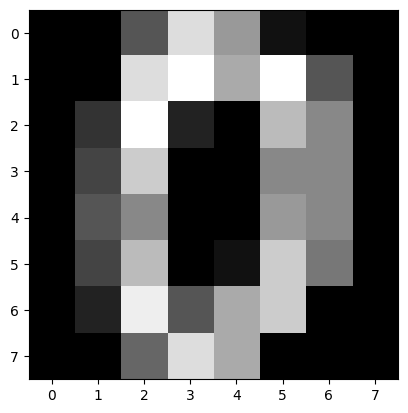

[[ 0.00000000e+00  5.01288597e-04 -3.49601748e-02  5.63874160e-02
   3.94753315e-02 -5.95609048e-02 -1.29922353e-01 -1.70298763e-02
  -5.61892770e-05 -4.45434549e-02 -1.70659586e-02  1.95362583e-01
   3.87608413e-02  9.34636491e-02 -3.52885896e-02 -1.72312243e-02
  -1.26128890e-03  2.93277163e-02  1.18519712e-01 -1.52276865e-02
  -3.48496763e-01  1.63951287e-01  7.80550421e-02 -4.90131627e-03
  -6.28265026e-04  1.41755175e-01  8.03194967e-02 -1.47037112e-01
  -4.33753163e-01  8.61123704e-03  8.89417194e-02 -8.24244588e-05
   0.00000000e+00  2.00391891e-01  7.25710981e-02 -1.68688129e-01
  -4.20201384e-01  5.68336296e-02  6.65632031e-02  0.00000000e+00
  -2.02983777e-04 -4.66796274e-02  2.73629237e-01 -1.40318245e-01
  -1.34099567e-01  1.14966948e-01  4.14831205e-02 -2.33530738e-04
  -5.71908750e-04 -1.11075772e-01  9.17731984e-02 -1.59157213e-02
   1.73222327e-01  3.70728888e-02  3.38182552e-03 -7.37028756e-03
  -5.08023227e-06 -7.17785225e-03 -7.92479470e-02  2.06906311e-01
  -3.47689

In [ ]:
# shuffle split: divide o dataset em 2 partes, e shuffle as partes, e treina o modelo com uma parte e testa com a outra
for i in range(10):
    print("\niteracao: ", i)
    X1, X2, y1, y2 = train_test_split(X,y,test_size=1/3)
    lr = LogisticRegression(max_iter=10_000).fit(X1,y1)
    y2e = lr.predict(X2)
    print("matriz de confusao:\n", confusion_matrix(y2,y2e))
    print("numero  total de erros: ", np.sum(y2!=y2e))
    print("numero total de acertos: ", np.sum(y2==y2e))



D = dt.load_digits()
X = D.data
y = D.target

y[:10]
x = X[0, :].reshape(8,8)
plt.imshow(x, cmap='gray')
plt.show()

lr = LogisticRegression(max_iter=10_000).fit(X,y)
print(lr.coef_)